In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [3]:
np.random.seed(0)

seq_length = 10
num_samples = 1000

X = np.random.randn(num_samples, seq_length, 1)
y = X.sum(axis=1) + 0.1 * np.random.randn(num_samples, 1)

print(f"Shape of input data (X): {X.shape}")
print(f"Shape of target data (y): {y.shape}")

Shape of input data (X): (1000, 10, 1)
Shape of target data (y): (1000, 1)


In [4]:
split_ratio = 0.8
split_index = int(split_ratio * num_samples)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print(f"Number of training samples: {len(X_train)}")
print(f"Number of testing samples: {len(X_test)}")

Number of training samples: 800
Number of testing samples: 200


In [5]:
model = Sequential()
model.add(SimpleRNN(units=50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 50)                2600      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [6]:
batch_size = 32
epochs = 50

history = model.fit(
    X_train, y_train,
    batch_size=batch_size,
    epochs=epochs,
    validation_split=0.2,
    verbose=1 
)

Epoch 1/50
20/20 [==============================] - 3s 37ms/step - loss: 8.7931 - val_loss: 6.2807
Epoch 2/50
20/20 [==============================] - 0s 8ms/step - loss: 5.6853 - val_loss: 3.4762
Epoch 3/50
20/20 [==============================] - 0s 10ms/step - loss: 3.3514 - val_loss: 2.0087
Epoch 4/50
20/20 [==============================] - 0s 8ms/step - loss: 1.2866 - val_loss: 0.7039
Epoch 5/50
20/20 [==============================] - 0s 8ms/step - loss: 0.3829 - val_loss: 0.2822
Epoch 6/50
20/20 [==============================] - 0s 8ms/step - loss: 0.2350 - val_loss: 0.1602
Epoch 7/50
20/20 [==============================] - 0s 8ms/step - loss: 0.1435 - val_loss: 0.1210
Epoch 8/50
20/20 [==============================] - 0s 9ms/step - loss: 0.1017 - val_loss: 0.0867
Epoch 9/50
20/20 [==============================] - 0s 10ms/step - loss: 0.0787 - val_loss: 0.0759
Epoch 10/50
20/20 [==============================] - 0s 9ms/step - loss: 0.0702 - val_loss: 0.0695
Epoch 11/50
20/2

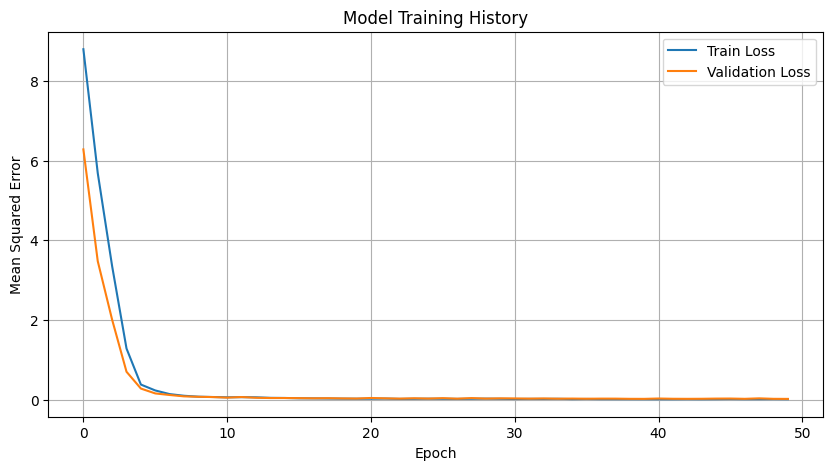

In [7]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()

In [10]:
test_loss = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss (Mean Squared Error): {test_loss:.4f}')

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f'Test Performance (R^2 Score): {r2:.4f}')



Test Loss (Mean Squared Error): 0.0215
7/7 [==============================] - 0s 4ms/step
Test Performance (R^2 Score): 0.9977


In [14]:
new_data = np.random.randn(5, seq_length, 1)

predictions = model.predict(new_data)

print("\n--- Predictions for New Data ---")

for i in range(len(new_data)):
    true_sum = new_data[i].sum()
    predicted_sum = predictions[i][0]
    print(f"Sequence {i+1} -> True Sum: {true_sum:.4f}, Predicted Sum: {predicted_sum:.4f}")

1/1 [==============================] - 0s 42ms/step

--- Predictions for New Data ---
Sequence 1 -> True Sum: 4.8125, Predicted Sum: 4.9411
Sequence 2 -> True Sum: -0.5916, Predicted Sum: -0.4905
Sequence 3 -> True Sum: 0.7782, Predicted Sum: 0.6632
Sequence 4 -> True Sum: 2.7518, Predicted Sum: 2.8454
Sequence 5 -> True Sum: 1.4123, Predicted Sum: 1.5603
